# 线性回归 - Pytorch的实现

用pytorch构建基本的线性回归模型，并为之后的网络构建打下基础


## Prepare dataset

准备数据集


In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

x_data = torch.Tensor([[1.0],[2.0],[3.0]])
y_data = torch.Tensor([[2.0],[4.0],[6.0]])


## Design model using Class

设计相关的模型，这里使用的是内置的nn模型

这部分将是以后设计网络的重要基础


In [4]:
# 继承内置torch.nn.Module的类
class LinearModel(torch.nn.Module):
    # 默认调用的函数
    def __init__(self):
        
        # 调用父类（torch.nn.Module）的构造的init
        super(LinearModel, self).__init__()
         
        # 构造一个对象，直接就包含了 w, b 
        # lineard 的参数（in_feature, out_feature, bias=True）
        # 将线性模型的输出，输入维度（列数）都设为1，并且设置 bias=True（默认就为真）；会自动进行backward等的操作
        self.linear = torch.nn.Linear(1, 1)
        
    def forward(self, x):
        # 即直接调用类中创建的linear，即这个函数使用了call方法；因此可以直接使用LinearModel（x）
        y_perd = self.linear(x)
        return y_perd

# 调用
model = LinearModel()


## Construct loss and optimizer

直接使用PyTorch的API就好

In [8]:
# MSE,但不求平均值，并默认自动转为标量；其也是继承自nn里面的对象
# 并且不求均值，因为每个batch的数量是一样的
criterion = torch.nn.MSELoss(reduction='sum')

# 优化 随机梯度下降
# 作用是找到所有的需要训练的变量（自动检查），并且设置学习速率
# 可以使用.Adam .RMSprop 等等的方法

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)


## Training cycle

进行前馈，反向传播，更新的训练过程


In [ ]:
epoch_list = []
loss_list = []

for epoch in range(500):
    # forward
    y_perd = model(x_data)
    
    # 计算loss
    loss = criterion(y_perd, y_data)
    
    print(epoch, loss.item())
    epoch_list.append(epoch)
    loss_list.append(loss.item())
    
    # 每一次训练将梯度归零
    optimizer.zero_grad()
    
    # backward（计算每一个节点的梯度，计算图就会释放）
    loss.backward()
    
    # update
    optimizer.step()

print('w= ', model.linear.weight.item())
print('b= ', model.linear.bias.item())


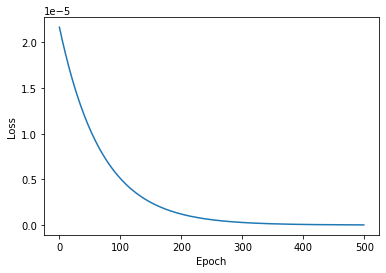

In [11]:
plt.plot(epoch_list, loss_list)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()